<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/TimeSeries_PreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series preprocessing refers to the steps taken to clean, transform, and prepare time series data for analysis or forecasting. It involves techniques aimed at improving data quality, removing noise, handling missing values, and making the data suitable for modeling. Preprocessing tasks may include removing outliers, handling missing values through imputation, scaling or normalizing the data, detrending, deseasonalizing, and applying transformations to stabilize variance. The goal is to ensure that the time series data is in a suitable format for subsequent analysis or modeling.

**Handling Missing Values :** Dealing with missing values in the time series data to ensure continuity and reliability in analysis.

**Dealing with Outliers:** Identifying and addressing observations that significantly deviate from the rest of the data, which can distort analysis results.

**Stationarity and Transformation:** Ensuring that the statistical properties of the time series, such as mean and variance, remain constant over time. Techniques like differencing, detrending, and deseasonalizing are used to achieve stationarity.

Stationarity

How to Check if Time Series Data is Stationary with Python?

Time series data are generally characterized by their temporal nature. This temporal nature adds a trend or seasonality to the data that makes it compatible for time series analysis and forecasting. Time-series data is said to be stationary if it doesn't change with time or if they don't have a temporal structure. So, it is highly necessary to check if the data is stationary. In time series forecasting, we cannot derive valuable insights from data if it is stationary.

Types of stationarity:
When it comes to identifying if the data is stationary, it means identifying the fine-grained notions of stationarity in the data. The types of stationarity observed in time series data include

Trend Stationary -  A time series that does not show a trend.

Seasonal Stationary - A time series that does not show seasonal changes.

Strictly Stationary - The joint distribution of observations is invariant to time shift.

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121
1949-06          135
1949-07          148
1949-08          148
1949-09          136
1949-10          119


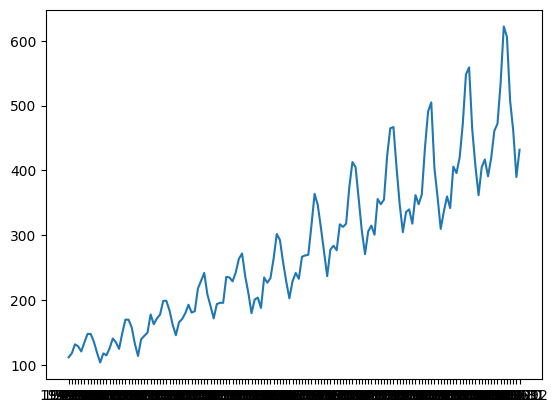

In [2]:
# import python pandas library
import pandas as pd

# import python matplotlib library for
# plotting
import matplotlib.pyplot as plt

# read the dataset using pandas read_csv()
# function
data = pd.read_csv("AirPassengers.csv",
                   header=0, index_col=0)

# print the first 6 rows of data
print(data.head(10))

# use simple line plot to understand the
# data distribution
plt.plot(data)

Now, let's partition this data into different groups and calculate the mean and variance of different groups and check for consistency.

In [12]:
# import the python pandas library
import pandas as pd

# use pandas read_csv() function to read the dataset.
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the air passengers count from
# the dataset using values function
values = data.values

# getting the count to split the dataset into 3
parts = int(len(values)/3)

# splitting the data into three parts
part_1, part_2, part_3 = values[0:parts], values[parts:(
    parts*2)], values[(parts*2):(parts*3)]

# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()

# calculating the variance of the separated
# three parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

# printing the mean of three groups
print('mean1=%f, mean2=%f, mean3=%f' % (mean_1, mean_2, mean_3))

# printing the variance of three groups
print('variance1=%f, variance2=%f, variance3=%f' % (var_1, var_2, var_3))

mean1=158.375000, mean2=269.041667, mean3=413.479167
variance1=1071.859375, variance2=3041.289931, variance3=6033.624566


The output clearly implies that the mean and variance of the three groups are considerably different from each other describing the data is non-stationary. Say for example if the means where mean_1 = 150, mean_2 = 160, mean_3 = 155 and variance_1 = 33, variance_2 = 35, variance_3 = 37, then we can conclude that the data is stationary. Sometimes this method can fail for some distributions, like log-norm distributions.

Let's try the same example as above but take the log of the passengers' count using NumPy's log() function and check the results.

[[4.71849887]
 [4.77068462]
 [4.88280192]
 [4.8598124 ]
 [4.79579055]
 [4.90527478]
 [4.99721227]
 [4.99721227]
 [4.91265489]
 [4.77912349]
 [4.6443909 ]
 [4.77068462]
 [4.74493213]
 [4.83628191]
 [4.94875989]]


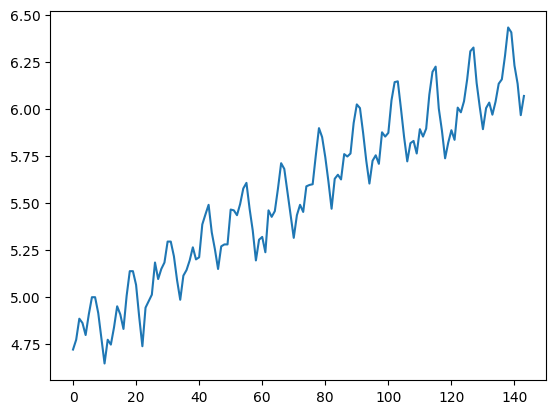

In [13]:
# import python pandas library
import pandas as pd

# import python matplotlib library for plotting
import matplotlib.pyplot as plt

# import python numpy library
import numpy as np

# read the dataset using pandas read_csv()
# function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the air passengers count
# from the dataset using values function
values = np.log(data.values)

# printing the first 15 passenger count values
print(values[0:15])

# using simple line plot to understand the
# data distribution
plt.plot(values)

The output signifies there is some trend but not very steep as the previous case, now let's compute the partition mean and variance

In [14]:
# getting the count to split the dataset
# into 3 parts
parts = int(len(values)/3)

# splitting the data into three parts.
part_1, part_2, part_3 = values[0:parts], values[parts:(parts*2)], values[(parts*2):(parts*3)]

# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()

# calculating the variance of the separated three
# parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))

# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=5.043911, mean2=5.574733, mean2=6.007884
variance1=0.042007, variance2=0.039668, variance2=0.032704


Ideally, we would have expected the mean and variance to be very different but they are the same, in such cases, this method can terribly fail. In order to avoid this, we have another statistical test which is discussed below.


Augmented Dickey-Fuller test


This is a statistical test that is dedicatedly built to test whether univariate time series data is stationary or not. This test is based on a hypothesis and can tell us the degree of probability to which it can be accepted. It is often classified under one of the unit root tests, It determines how strongly, a univariate time series data follows a trend. Let's define the null and alternate hypotheses,

Ho (Null Hypothesis): The time series data is non-stationary

H1 (alternate Hypothesis): The time series data is stationary

Assume alpha = 0.05, meaning (95% confidence). The test results are interpreted with a p-value if p > 0.05 fails to reject the null hypothesis, else if p <= 0.05 reject the null hypothesis. Now, let's use the same air passengers dataset and test it using adfuller() statistical function provided by the stats model package, to check whether the data is stationary or not.

In [16]:
# import python pandas package
import pandas as pd

# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# read the dataset using pandas read_csv() function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the passengers count using values function
values = data.values

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: 0.815369
p-value: 0.991880
critical values at different levels:
	1%: -3.482
	5%: -2.884
	10%: -2.579


As per our hypothesis, the ADF statistic is much greater than the critical values at different levels, and also the p-value is also greater than 0.05 which signifies, we can fail to reject the null hypothesis at 90%, 95%, and 99% confidence, meaning the time series data is strongly non-stationary.

Now, let's try running the ADF test to the log normed values and cross-check our results.

In [17]:
# import python pandas package
import pandas as pd

# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# import python numpy package
import numpy as np

# read the dataset using pandas read_csv() function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the passengers count using
# values function and applying log transform on it.
values = np.log(data.values)

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.717017
p-value: 0.422367
critical values at different levels:
	1%: -3.482
	5%: -2.884
	10%: -2.579


As you can see, the ADF test one more times shows that the ADF statistic is much greater than the critical values at different levels, and also the p-value is much greater than 0.05 which signifies, we can fail to reject the null hypothesis at 90%, 95%, and 99% confidence, meaning the time series data is strongly non-stationary.

Hence, the ADF unit root test stands out to be a robust test to check whether a time series data is stationary or not.

Seasonal Adjustment and Differencing in Time Series

Why is Seasonal Differencing important?
Differentiating is crucial for a number of reasons.

The assumption of stationarity is a fundamental feature of many statistical models, including autoregressive and ARIMA models. Differencing is appropriate for these models since it can convert a non-stationary series into a stationary one.

Forecasting Accuracy: By eliminating autocorrelation—the association between values in a time series at various lags—differencing may increase the precision of forecasting models. Distancing aids in mitigating the forecasting bias that autocorrelation may cause.

Trend and Cycle Analysis: By eliminating short-term changes from a time series, differencing may assist in identifying patterns and cycles. In the analysis of economic data, where seasonal and irregular variables might obscure underlying patterns, this can be very helpful.

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

Here, 'seasonal_decompose' function is used from the Statsmodels library in to decompose a time series into its trend, seasonal, and residual (irregular or error) components. Multiplicative decomposition is used with a period of 12 (assuming monthly data), meaning that the seasonal component repeats every 12 observations.

In [15]:
# Seasonal adjustment
result = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
df['Seasonal_Adjusted'] = result.resid

In [17]:
# Differencing
df['Differenced'] = df['Passengers'].diff()

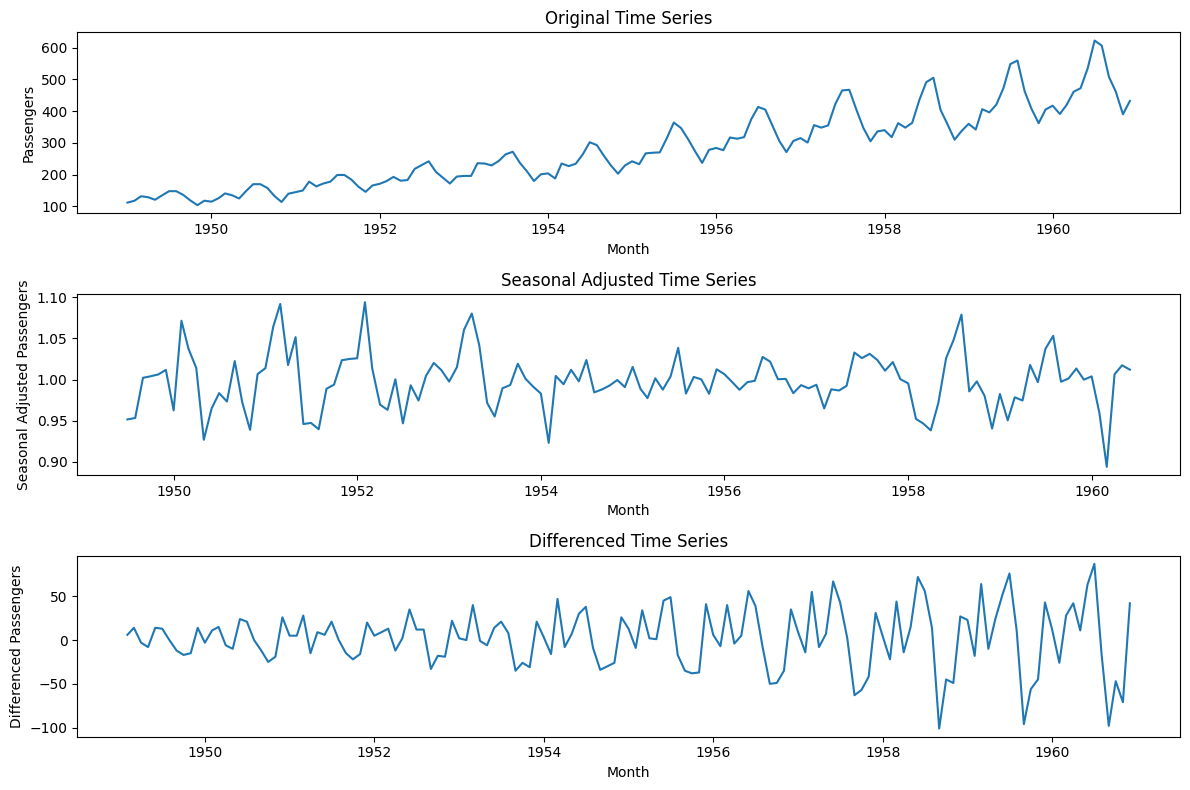

In [18]:
# Visualize the results
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(3, 1, 1)
plt.plot(df['Passengers'])
plt.title('Original Time Series')
plt.xlabel('Month')
plt.ylabel('Passengers')

# Seasonal Adjusted
plt.subplot(3, 1, 2)
plt.plot(df['Seasonal_Adjusted'])
plt.title('Seasonal Adjusted Time Series')
plt.xlabel('Month')
plt.ylabel('Seasonal Adjusted Passengers')

# Differenced
plt.subplot(3, 1, 3)
plt.plot(df['Differenced'])
plt.title('Differenced Time Series')
plt.xlabel('Month')
plt.ylabel('Differenced Passengers')

plt.tight_layout()
plt.show()

In this part, a subplot containing three panels that each highlight a distinct time series feature is created using Matplotlib

The original time series is shown in the first subplot.
The adjusted for seasons time series is shown in the second subplot.
The distinct time series data are shown in the third subplot.

The output displays the seasonally adjusted time series, the differenced time series, and the original time series of airline passenger counts. The original data's seasonal oscillations are eliminated from the seasonally adjusted time series, which facilitates the identification of the underlying trend. The data are stationary due to the differenced time series, which is crucial for several statistical studies.

Understanding the Moving average (MA) in Time Series Data

What is the Moving Average Model?
Moving Average Models are a type of time series analysis model usually used in econometrics to forecast trends and understand patterns in time series data. In moving average models the present value of the time series depends on the linear combination of the past white noise error terms of the time series. In time series analysis moving average is denoted by the letter "q" which represents the order of the moving average model, or in simple words we can say the current value of the time series will depend on the past q error terms. Therefore, the moving average model of order q could be represented as:

$X_{t}$ = c + $ϵ_{t}$ + $θ_{1}$ * $ϵ_{t}$ − 1 .....



Here,

$X_{t}$ is the value of time series at time t

c is a constant or the mean of the time series

$ϵ_{t}$ , $ϵ_{t}$ − 1,
are the white noise terms associated with the time series at time t, t-1, t-2, ... , t-q.

$θ_{1}$ is the moving average constants.


Concept Related to Moving Average:

Stationarity: Stationarity is the principle of time series data that conveys that the statistical properties of the data doesn't change with time, the mean of the data remains the same or we can also say that the data fluctuates around a certain value, the standard deviation of the time series data nearly remains constant, and there must not be any seasonality in the time series data or there is no periodic behavior in the data. We can check for the stationarity of the dataset visually as well as through Augmented Dickey-Fuller(ADF) Test. We consider stationarity to be one of the most important aspect that the time series data must possess in order to be accepted by the models that are applied to time series data for accurate modelling.

Differencing: Differencing is one of the most important steps to consider during time series analysis, after taking a peek at the original time series data, if the data is not stationary and contains a lot of trends then differencing must be considered since for accurate time series data analysis the data must be stationary. In regular differencing the current time series data is subtracted by the previous data point.

White Noise: White noise is the error term which has the mean of zero and a constant standard deviation with no correlation of the data points with each other. White noise acts as a benchmark in the forecasting process through time series modelling, if the forecast error is nor white noise further modifications could be performed on the model, but if it reaches a state such that the forecast errors are white noise then the model would need no further improvements. The value of white noise series are random and unpredictable therefore if any time series data is a white noise then there is no method to model or forecast it.

ACF Plot: Autocorrelation Function plot or the ACF plot is the plot of correlation between the time series and its lagged version. It shows how similar the time series is with it's different lagged values. Here the lag term is a fixed time displacement, in the ACF plot the x-axis is the lagged time series and the y-axis is the correlation which ranges from -1 to 1.

The code mentioned imports important libraries including pandas for data manipulation, numpy for mathematical computation, matplotlib for plotting the different graphs and measure relationships between variables, plot_acf and plot_pacf for plotting acf and pacf plots of the data to identify model order. ARIMA model to fit the order of the model and forecast the data provided. We will be importing yfinance which stands for yahoo finance through which we will get the access to the stock price of AMD and warnings to filter the unnecessary warnings that pop up with output. At the end we will be using matplotlib's rcParams method which will help in setting the figure size as (15, 5), since our dataset will be spreadout.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 15, 5

Here first we will be downloading the AMD stock price and saving the values from 1st January, 2020 into a variable called AMD_values the .history method lets us go back in history and extract value from any time where the value of the stock existed. The AMD_values will act as a time series in our example, after these steps we will be plotting the closing price of the AMD_values dataframe.

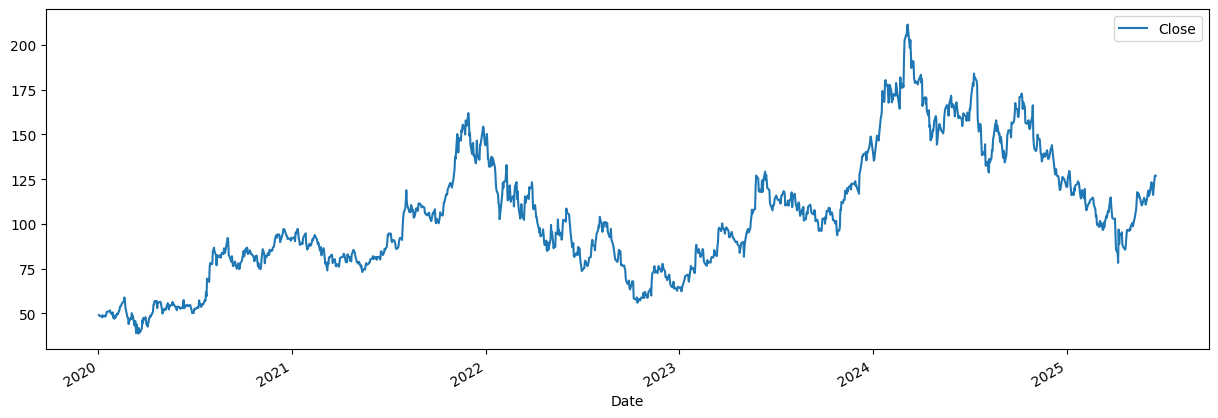

In [7]:
AMD = yf.Ticker("AMD")

# getting the historical market data
AMD_values = AMD.history(start="2020-01-01")

# Plotting the close price of AMD
AMD_values[['Close']].plot();

Now in the next step the we will be calculating 10-day rolling average values of closing price and adding it as a new column named rolling_av, we are calculating the rolling average value of the closing data since it helps in smoothing out the fluctuations in the time series data, such that the data could be modelled and analyzed in a better way. After this step we will be plotting the closing value and the rolling average value of the data.

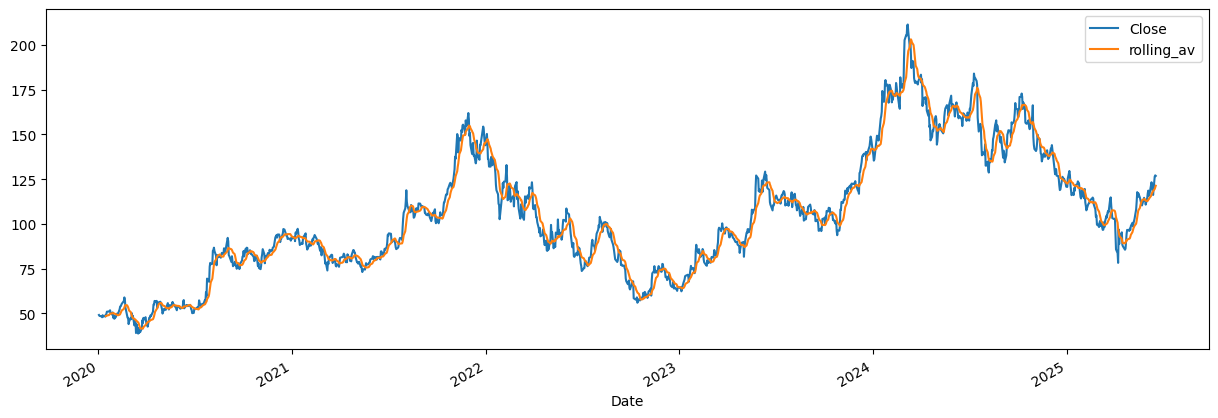

In [20]:
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()

# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot();

Here first we will be defining a function which takes the time series data as a parameter and generate the ACF and Partial ACF plots of it, after defining such function we will be fitting the data we are modelling. We will be plotting last 20 lags to see how the current data depends on the past noise data.

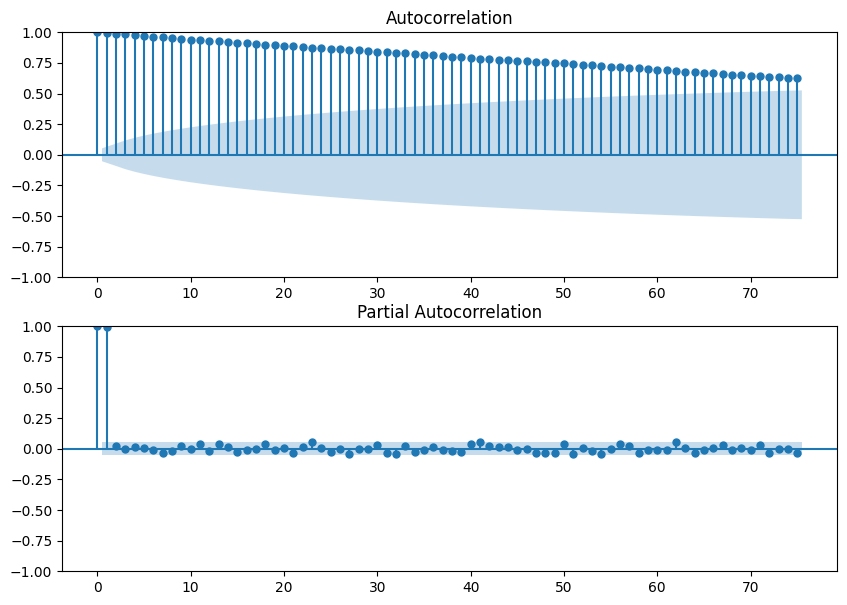

In [9]:
# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    plot_acf(timeseries, ax=ax1, lags=75)
    plot_pacf(timeseries, ax=ax2, lags=75)
    plt.show()


# Plotting ACF and PACF of the closing value time series
plot_acf_pacf(AMD_values['Close'])

Here, we can see in the ACF plot that the first lag has a correlation of 1 since is the same error term as that of the current time series but from the second lag we can see that the ACF plot is reducing but the correlation value between the lags decreases slowly, here if we model more lag values, we'll find out the order of q gets more than 50.

The blue region signifies where the values are no longer statistically significant. From the above plot, we can that see that the last significant lag is the 55. Therefore, our model order for the MA model will be 55. The value of q to be 55 which means the current value will depend on the last 55 error values of the data.



In the next step we will be fitting an ARIMA model to the closing prices of AMD stock with an order of (0, 0, 55), indicating 55 lags for the moving average component or the order of the moving average model to be 55. After that we will be printing the summary of the fitted ARIMA model such that the coefficient of the past noise values could be analyzed.

In [10]:
#creating the model
MA_model = ARIMA(endog=AMD_values['Close'], order=(0, 0, 55))

#fitting data to the model
results = MA_model.fit()

#summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1373
Model:                ARIMA(0, 0, 55)   Log Likelihood               -5430.073
Date:                Fri, 20 Jun 2025   AIC                          10974.145
Time:                        02:29:37   BIC                          11271.956
Sample:                             0   HQIC                         11085.582
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.0382     45.245      2.299      0.021      15.359     192.718
ma.L1          1.8756     40.646      0.046      0.963     -77.790      81.541
ma.L2          2.8881    116.876      0.025      0.9

From the statistical point of view we can see that coeff. of the constant is 91 which works as the mean of the closing value of the dataset and we can observe the coefficient of the noise values from ma.L1 - ma.L55 and the p values are all near 0, therefore, these observations are significant.

In [11]:
#prediction data
start_date = '2023-12-15'
end_date   = '2024-02-05'
AMD_values['prediction'] = results.predict(start=start_date, end=end_date)

#printing last 14 values of the prediction with original and rolling avg value
print(AMD_values[['Close','rolling_av','prediction']].tail(14))

                                Close  rolling_av  prediction
Date                                                         
2025-05-30 00:00:00-04:00  110.730003  112.967999         NaN
2025-06-02 00:00:00-04:00  114.629997  112.713999         NaN
2025-06-03 00:00:00-04:00  117.309998  112.970999         NaN
2025-06-04 00:00:00-04:00  118.580002  113.477999         NaN
2025-06-05 00:00:00-04:00  115.690002  113.841000         NaN
2025-06-06 00:00:00-04:00  116.190002  114.389000         NaN
2025-06-09 00:00:00-04:00  121.730003  115.531001         NaN
2025-06-10 00:00:00-04:00  123.239998  116.399001         NaN
2025-06-11 00:00:00-04:00  121.139999  117.227000         NaN
2025-06-12 00:00:00-04:00  118.500000  117.774001         NaN
2025-06-13 00:00:00-04:00  116.160004  118.317001         NaN
2025-06-16 00:00:00-04:00  126.389999  119.493001         NaN
2025-06-17 00:00:00-04:00  127.099998  120.472001         NaN
2025-06-18 00:00:00-04:00  126.790001  121.293001         NaN


Through the table we can conclude that the moving average model of order 15 is pretty good for the given dataset as the predictions value nearly matches the original closing value of the daily AMD stock price

At the last step predictions are plotted with the original data set and the rolling value of the original value. This visualization helps compare the model's forecasts against the actual data.

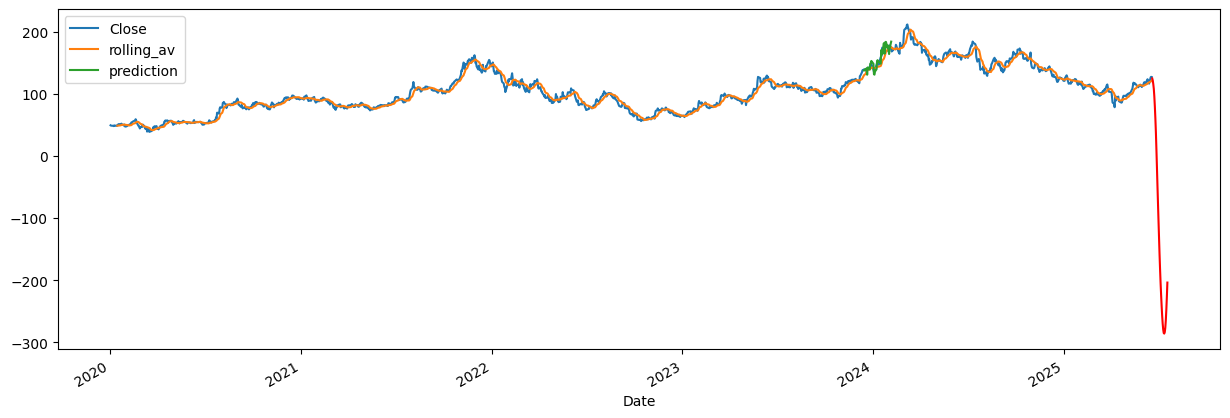

In [12]:
# Forecast future values
# Forecast future closing prices
forecast_steps = 30  # Forecasting for the next 30 days
forecast_index = pd.date_range(start=AMD_values['Close'].index[-1], periods=forecast_steps+1, freq='D')[1:]  # Generate datetime index for forecast
forecast = results.forecast(steps=forecast_steps)

# plotting the end results
AMD_values[['Close','rolling_av','prediction']].plot()
plt.plot(forecast_index, forecast, color='red', label='Forecast')

The green line shows the predicted value by the moving average model, the blue line represents the original data that we are modelling in this code example and the orange plot is the rolling average value plot of the original data. The green line follows the trend in a pretty good way; therefore, we can conclude that the moving average model was good in analyzing the AMD stock data. The red line represents the forecasting values for next 30 days.